In [48]:
# import statements
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml

# Question 3

Consider the $f: \mathbb{R}^2 \rightarrow \mathbb{R}$ with $f(x_1, x_2) = (x_1-2)^2 + (x_2-2)^2-x_1x_2$ and the
following constrained optimization problem:
$$
\min_{x_1,x_2} f(x_1,x_2) \quad \text{subject to} \quad 0\leq x_i\leq
1,\text{ $i=1,2$}.
$$
Write a projected gradient descent algorithm, with constant step size $\mu =
0.001$ starting at $(0.5,0.5)$ for 175 iterations, for the above optimization
problem. Plot the function value $f(x^{(t)})$ against the iteration $t$.

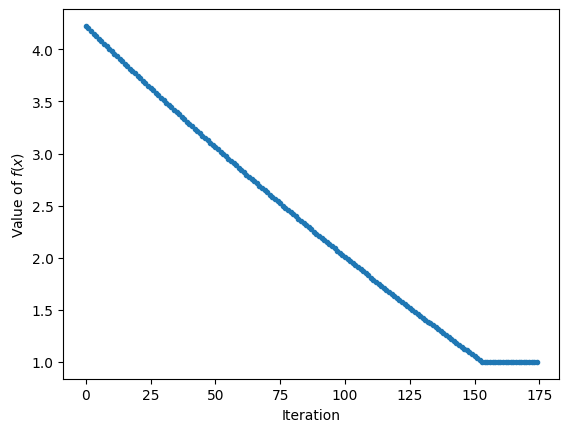

In [49]:
mu = 0.001
x = np.array([0.5, 0.5])
x_values = []
iterations = range(175)

def f(x_1, x_2):
    return (x_1 - 2)**2 + (x_2 - 2)**2 - x_1 * x_2

def df(x_1, x_2):
    return np.array([2 * (x_1 - 2) - x_2,  2 * (x_2 - 2) - x_1])

for i in iterations:
    y = x - mu * df(x[0], x[1])
    x = [min(max(0, y[0]), 1), min(max(0, y[1]), 1)]
    x_values.append(f(x[0], x[1]))
    
plt.plot(iterations, x_values, marker='.')
plt.xlabel("Iteration")
plt.ylabel(r"Value of $f(x)$")
plt.show()

# Question 4

In this coding question, you'll implement a classifier with logistic regression
$$ F(w) = \frac{1}{N} \sum_{i=1}^N \log( 1 + e^{-\langle w, x_i \rangle y_i} ). $$

We will redo the MNIST coding question from HW3.5 but using different versions
of gradient descent
$$
w^{(t+1)} = w^{(t)} - \mu p^{(t)}.
$$
This time, we will differentiate 4's and 9's. That is, instead of classifying images of 0 and 1, you classify the images of 4 and 9.

# Loading MNIST Data

In this section, you will learn to load MNIST data.  If you do not have tensorflow available on your jupyter notebook, uncomment the next cell, run it, restart the kernel, and comment the next cell once more.

In [50]:
# !pip3 install scikit-learn

In [51]:
# this cell will take a minute to run depending on your internet connection
X, y = fetch_openml('mnist_784', version=1, return_X_y=True) # getting data from online
print('X shape:', X.shape, 'y shape:', y.shape)

X shape: (70000, 784) y shape: (70000,)


In [52]:
# this cell processes some of the data

# if this returns an error of the form "KeyError: 0", then try running the following first:
# X = X.values # this converts X from a pandas dataframe to a numpy array

X = X.values
digits = {j:[] for j in range(10)}
for j in range(len(y)): # takes data assigns it into a dictionary
    digits[int(y[j])].append(X[j].reshape(28,28))
digits = {j:np.stack(digits[j]) for j in range(10)} # stack everything to be one numpy array
for j in range(10):
    print('Shape of data with label', j, ':', digits[j].shape )

Shape of data with label 0 : (6903, 28, 28)
Shape of data with label 1 : (7877, 28, 28)
Shape of data with label 2 : (6990, 28, 28)
Shape of data with label 3 : (7141, 28, 28)
Shape of data with label 4 : (6824, 28, 28)
Shape of data with label 5 : (6313, 28, 28)
Shape of data with label 6 : (6876, 28, 28)
Shape of data with label 7 : (7293, 28, 28)
Shape of data with label 8 : (6825, 28, 28)
Shape of data with label 9 : (6958, 28, 28)


In [53]:
# this cell would stack 100 examples from each class together
# this cell also ensures that each pixel is a flot between 0 and 1 instead of an int between 0 and 255
data = []

for i in range(10):
    flattened_images = digits[i][:100].reshape(100,-1)
    data.append(flattened_images)
    
data = np.vstack(data)
data = data.astype('float32') / 255.0

### Data PreProcess

In [54]:
x_4 = digits[4][:500].reshape(500,-1)
x_9 = digits[9][:500].reshape(500,-1)

x_4_test = digits[4][500:1000].reshape(500,-1)
x_9_test = digits[9][500:1000].reshape(500,-1)

x_train = np.vstack((x_4, x_9))
x_train = x_train.astype('float32') / 255.0

x_test = np.vstack((x_4_test, x_9_test))
x_test = x_test.astype('float32') / 255.0

y_train = np.hstack((-1 * np.ones(500), np.ones(500)))
y_test = np.hstack((-1 * np.ones(500), np.ones(500)))

### Defining $F(w)$ and $\nabla F(w)$

In [55]:
def F(w):
    sum = 0
    N = len(x_train)
    for i in range(N):
        sum += np.log(1 + np.exp(-y_train[i] * np.dot(w, x_train[i])))
    return sum / N

def dF(w):
    sum = 0
    N = len(x_train)
    for i in range(N):
        sum += -y_train[i] * np.exp(-y_train[i] * np.dot(w, x_train[i])) * x_train[i] / (1 + np.exp(-y_train[i] * np.dot(w, x_train[i])))
    return sum / N

### $L^2$ Gradient Descent

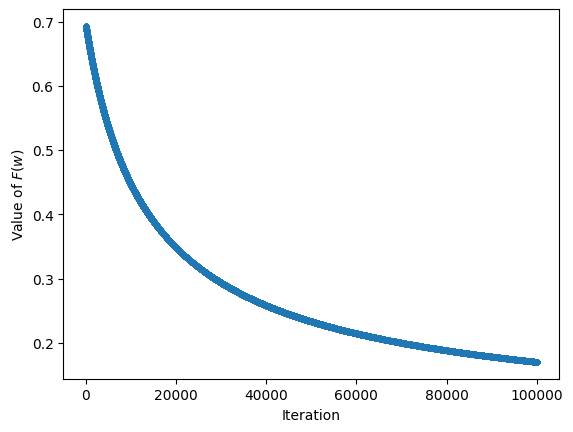

In [56]:
mu = 1e-4
T = 100000

w_values = []
iterations = range(T)

w = np.zeros(x_train.shape[1])
for i in iterations:
    w_values.append(F(w))
    w = w - mu * dF(w)

plt.plot(iterations, w_values, marker='.')
plt.xlabel("Iteration")
plt.ylabel(r"Value of $F(w)$")
plt.show()

### Error Rate

In [ ]:
error = 0

for i in range(1000):
    if np.dot(w, x_test[i]) > 0:
        y_test[i] = 1
    else:
        y_test[i] = -1
    error += (y_test[i] != y_train[i])

print("Error rate:", error / 1000 * 100, "%")

Error rate: 4.2 %


## Part 4A

Implement and run $L^\infty$ gradient descent with step size $\mu=10^{-6}$. Run
your algorithm for at least 10000 iterations and initialize with $w^{(0)} = 0$
(i.e. the zero vector). **Recall:** $L^{\infty}$ gradient descent uses steps
$$
p^{(t)} = \text{sign}(\nabla F(w^{(t)}))\|\nabla F(w^{(t)})\|_1.
$$

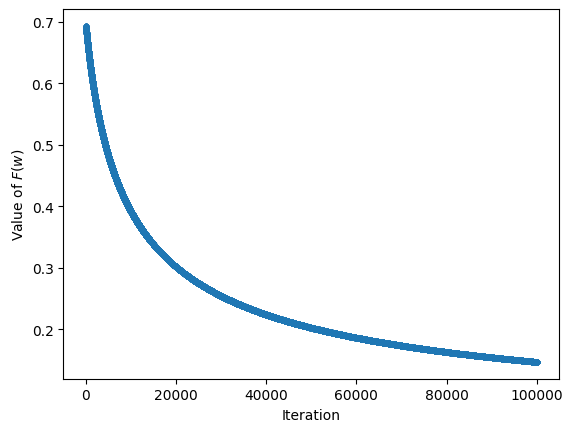

In [58]:
mu = 1e-6
T = 100000

w_values = []
iterations = range(T)

def p(w):
    f = dF(w)
    return np.sign(f) * np.linalg.norm(f, 1)
    
w = np.zeros(x_train.shape[1])
for i in iterations:
    w_values.append(F(w))
    w = w - mu * p(w)

plt.plot(iterations, w_values, marker='.')
plt.xlabel("Iteration")
plt.ylabel(r"Value of $F(w)$")
plt.show()

### Error Rate

In [59]:
error = 0

for i in range(1000):
    if np.dot(w, x_test[i]) > 0:
        y_test[i] = 1
    else:
        y_test[i] = -1
    error += (y_test[i] != y_train[i])

print("Error rate:", error / 1000 * 100, "%")

Error rate: 5.7 %


## Part 4b

Implement and run $L^1$ gradient descent (aka. coordinate descent) with step
size $\mu=10^{-4}$. Run your algorithm for at least 10000 iterations and
initialize with $w^{(0)} = 0$ (i.e. the zero vector). **Recall:** $L^{1}$ gradient
descent uses steps
$$
p^{(t)} = \text{sign}(\nabla_{j^*} F(w^{(t)}))\|\nabla F(w^{(t)})\|_\infty e_{j^*},
$$
where $j^*$ is the location of the largest entry of the gradient,
and $e_j$ is the zero vector with a 1 in the $j^{th}$ entry.

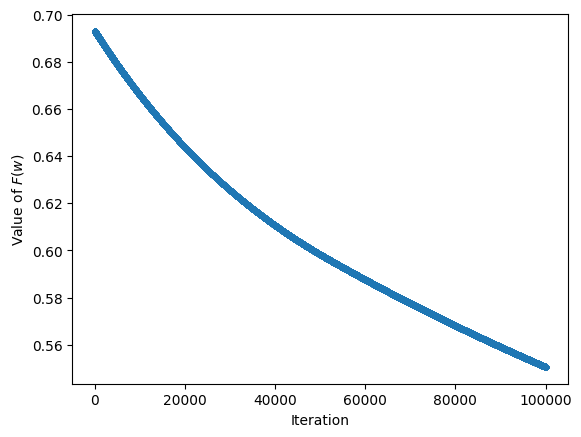

In [60]:
mu = 1e-4
T = 100000

w_values = []
iterations = range(T)
running_sum = np.zeros(x_train.shape[1])

def p(w):
    f = dF(w)
    j = 0
    for i in range(len(f)):
        if abs(f[i]) > abs(f[j]):
            j = i
    running_sum[j] += 1
    return f[j] * np.eye(len(f))[j]
    
w = np.zeros(x_train.shape[1])
for i in iterations:
    w_values.append(F(w))
    w = w - mu * p(w)

plt.plot(iterations, w_values, marker='.')
plt.xlabel("Iteration")
plt.ylabel(r"Value of $F(w)$")
plt.show()

### Error Rate

In [61]:
error = 0

for i in range(1000):
    if np.dot(w, x_test[i]) > 0:
        y_test[i] = 1
    else:
        y_test[i] = -1
    error += (y_test[i] != y_train[i])

print("Error rate:", error / 1000 * 100, "%")

Error rate: 9.700000000000001 %


## Part 4c

Compare these two descent plots of $F(w)$, along with the
analogous plot for gradient descent from HW3.5. Which performs best, and do you
have an argument for why? Do you think the performance would change with different
step sizes?

### Answer

Judging from the plots, the $L^2$ and $L^\infty$ gradient descent converges the
quickest, and the $L^1$ version converges the slowest, so I would rank their
performances in the order of $L^2 = L^\infty > L^1$. I believe $L^1$ gradient
descent performs the worst because it only targets one coordinate at a time. On
the other hand, $L^\infty$ and $L^2$ gradient descent covers all possible
descent direction, so they perform better than $L^1$. I think step sizes would
affect the performances to an extent, but the rank of their performances would
not change given the optimal step sizes.

## Part 4d

For the coordinate descent problem, rerun gradient descent
but store a running sum of which entry of $p^{(t)}$ is nonzero at each iteration
(not the actual value of the direction vector, just $e_{j^*}$). This will result
in a size 784 vector of mostly zeros, and should have integers at various entries
whose sum equals the number of iterations. Reshape this vector to be a 28x28 image
and display the result. Why do you think these are the pixels that were chosen in
the gradient? How can you use this to interpret the algorithm and its results?

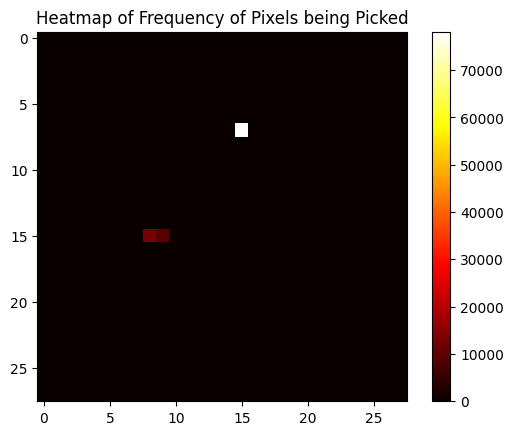

In [68]:
plt.imshow(running_sum.reshape(28, 28), cmap='hot')
plt.colorbar()
plt.title("Heatmap of Frequency of Pixels being Picked")
plt.show()

I think these pixels are chosen because they are the most significant features
distinguishing 4's and 9's. The most chosen pixels (white and red) are
positioned around the area where a 4 would have a shape angle while a 9 would be
round. Hence, the $L^1$ gradient descent, though not being the most performant,
can be used to analyze what/where the most influential features are.